## Решение задачи классификации с помощью нейронной сети

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

data = pd.read_csv('Raisin_essential.csv', sep=';')

X = data[['Area', 'Eccentricity', 'Extent']].values
y = data['Class'].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard
import datetime

def create_model(hidden_layers=[32, 16], activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=X_train.shape[1], activation=activation))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))  
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [17]:

hidden_layers = [64, 32]
activation = 'relu'
dropout_rate = 0.2
epochs = 50
batch_size = 16

model = create_model(hidden_layers, activation, dropout_rate)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[tensorboard_callback],
    verbose=1
)

Epoch 1/50


/Users/ilavoronin/Учеба/СИИиМО/myenv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6649 - loss: 0.6175 - val_accuracy: 0.8403 - val_loss: 0.4856
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.4723 - val_accuracy: 0.8750 - val_loss: 0.3780
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.4132 - val_accuracy: 0.8958 - val_loss: 0.3256
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 0.3883 - val_accuracy: 0.9097 - val_loss: 0.3041
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8542 - loss: 0.3760 - val_accuracy: 0.9167 - val_loss: 0.2941
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - loss: 0.3753 - val_accuracy: 0.9097 - val_loss: 0.2909
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8663 - loss: 0.3628 - val_accuracy: 0.9167 - val_loss: 0.2875
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8559 - loss: 0.3673 - val_accuracy: 0.9167 - val_loss: 0.2858
Epo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

📊 Classification Report:
              precision    recall  f1-score   support

       Besni       0.86      0.83      0.84        86
     Kecimen       0.85      0.87      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

0.9240475012370113


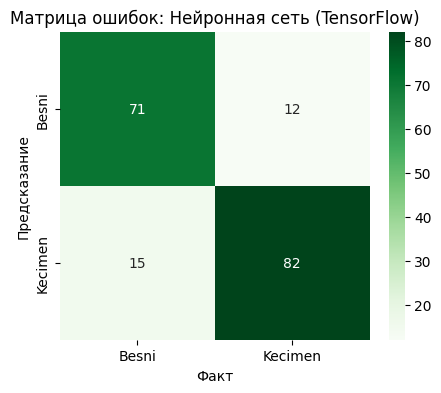

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

roc_auc = roc_auc_score(y_test, y_pred_prob)

print(roc_auc)

# Матрица ошибок
matrix = confusion_matrix(y_test, y_pred)
matrix_custom = matrix.T 

plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title("Матрица ошибок: Нейронная сеть (TensorFlow)")
plt.xlabel("Факт")
plt.ylabel("Предсказание")
plt.show()

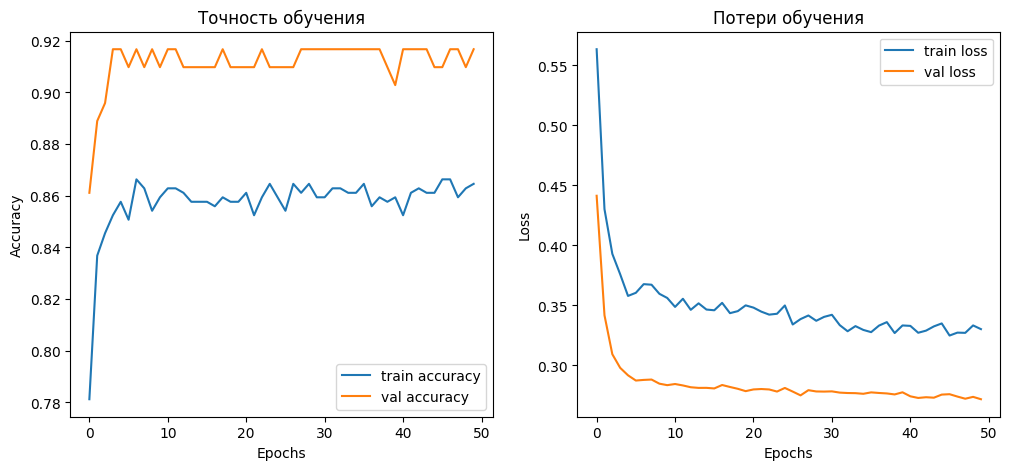

In [ ]:


# График точности
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Точность обучения')

# График потерь
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Потери обучения')
plt.show()

## Тестирование параметров модели


Модель 1/24: Layers=[32, 16], Act=relu, Drop=0.0, Batch=8


/Users/ilavoronin/Учеба/СИИиМО/myenv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Модель 2/24: Layers=[32, 16], Act=relu, Drop=0.0, Batch=16

Модель 3/24: Layers=[32, 16], Act=relu, Drop=0.2, Batch=8

Модель 4/24: Layers=[32, 16], Act=relu, Drop=0.2, Batch=16

Модель 5/24: Layers=[32, 16], Act=tanh, Drop=0.0, Batch=8

Модель 6/24: Layers=[32, 16], Act=tanh, Drop=0.0, Batch=16

Модель 7/24: Layers=[32, 16], Act=tanh, Drop=0.2, Batch=8

Модель 8/24: Layers=[32, 16], Act=tanh, Drop=0.2, Batch=16

Модель 9/24: Layers=[64, 32], Act=relu, Drop=0.0, Batch=8

Модель 10/24: Layers=[64, 32], Act=relu, Drop=0.0, Batch=16

Модель 11/24: Layers=[64, 32], Act=relu, Drop=0.2, Batch=8

Модель 12/24: Layers=[64, 32], Act=relu, Drop=0.2, Batch=16

Модель 13/24: Layers=[64, 32], Act=tanh, Drop=0.0, Batch=8

Модель 14/24: Layers=[64, 32], Act=tanh, Drop=0.0, Batch=16

Модель 15/24: Layers=[64, 32], Act=tanh, Drop=0.2, Batch=8

Модель 16/24: Layers=[64, 32], Act=tanh, Drop=0.2, Batch=16

Модель 17/24: Layers=[128, 64, 32], Act=relu, Drop=0.0, Batch=8

Модель 18/24: Layers=[128, 64, 32]

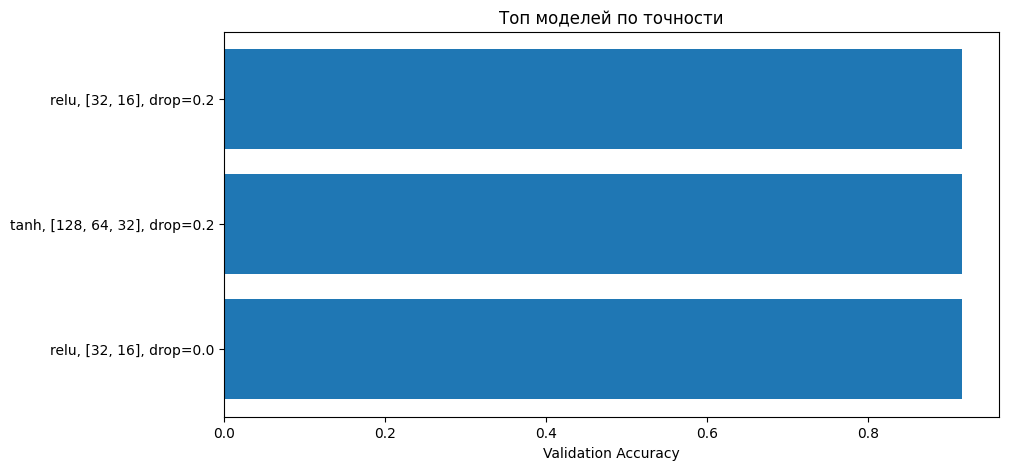

/Users/ilavoronin/Учеба/СИИиМО/myenv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

       Besni       0.86      0.84      0.85        86
     Kecimen       0.85      0.87      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.86       180
weighted avg       0.86      0.86      0.86       180



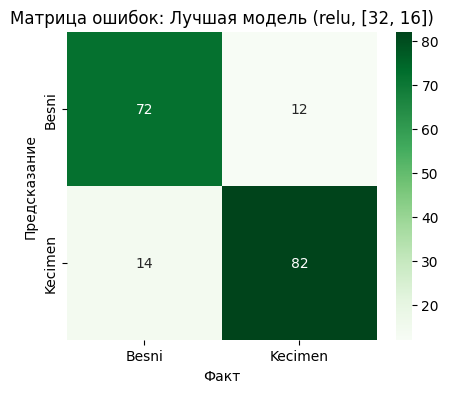

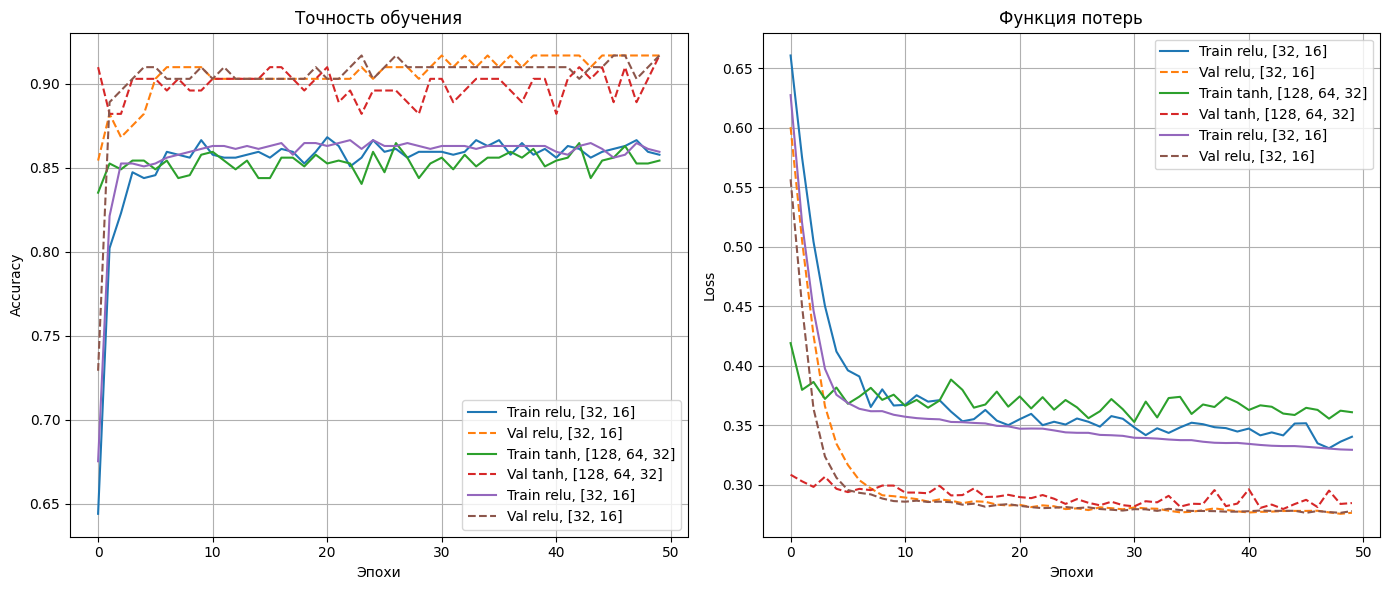

In [13]:
import pandas as pd
import numpy as np
import itertools
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import datetime
import os

data = pd.read_csv('Raisin_essential.csv', sep=';')

X = data[['Area', 'Eccentricity', 'Extent']].values
y = data['Class'].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def create_model(hidden_layers=[32, 16], activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=X_train.shape[1], activation=activation))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # бинарная классификация
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


param_grid = {
    'hidden_layers': [[32, 16], [64, 32], [128, 64, 32]],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.2],
    'batch_size': [8, 16],
    'epochs': [50]
}

param_combinations = list(itertools.product(
    param_grid['hidden_layers'],
    param_grid['activation'],
    param_grid['dropout_rate'],
    param_grid['batch_size'],
    param_grid['epochs']
))

results = []


for i, (hidden_layers, activation, dropout_rate, batch_size, epochs) in enumerate(param_combinations):
    print(f"\nМодель {i+1}/{len(param_combinations)}: "
          f"Layers={hidden_layers}, Act={activation}, Drop={dropout_rate}, Batch={batch_size}")

    log_dir = os.path.join(
        "logs/fit/",
        f"model_{i+1}_{activation}_drop{dropout_rate}_layers{'-'.join(map(str, hidden_layers))}_{datetime.datetime.now().strftime('%H%M%S')}"
    )
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    model = create_model(hidden_layers, activation, dropout_rate)

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[tensorboard_callback],
        verbose=0
    )

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    results.append({
        'model_id': i + 1,
        'hidden_layers': hidden_layers,
        'activation': activation,
        'dropout_rate': dropout_rate,
        'batch_size': batch_size,
        'epochs': epochs,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'history': history
    })


results_df = pd.DataFrame(results).sort_values(by='val_accuracy', ascending=False)
print("\nРЕЗУЛЬТАТЫ ВСЕХ МОДЕЛЕЙ (по валидационной точности):")
print(results_df[['model_id', 'hidden_layers', 'activation', 'dropout_rate', 'batch_size', 'val_accuracy']])

# лучшие модели

top_models = results_df.head(3)
plt.figure(figsize=(10, 5))
plt.barh(
    [f"{r.activation}, {r.hidden_layers}, drop={r.dropout_rate}" for _, r in top_models.iterrows()],
    top_models['val_accuracy']
)
plt.xlabel("Validation Accuracy")
plt.title("Топ моделей по точности")
plt.gca().invert_yaxis()
plt.show()

best_model_info = results_df.iloc[0]
best_model_params = {
    "hidden_layers": best_model_info.hidden_layers,
    "activation": best_model_info.activation,
    "dropout_rate": best_model_info.dropout_rate,
    "batch_size": best_model_info.batch_size,
    "epochs": best_model_info.epochs
}
best_model = create_model(
    hidden_layers=best_model_params["hidden_layers"],
    activation=best_model_params["activation"],
    dropout_rate=best_model_params["dropout_rate"]
)
best_model.fit(
    X_train, y_train,
    epochs=best_model_params["epochs"],
    batch_size=best_model_params["batch_size"],
    verbose=0
)

y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

print(classification_report(y_test, y_pred, target_names=le.classes_))

matrix = confusion_matrix(y_test, y_pred)
matrix_custom = matrix.T

plt.figure(figsize=(5, 4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f"Матрица ошибок: Лучшая модель ({best_model_params['activation']}, {best_model_params['hidden_layers']})")
plt.xlabel("Факт")
plt.ylabel("Предсказание")
plt.show()
# графики

plt.figure(figsize=(14, 6))

# --- Точность ---
plt.subplot(1, 2, 1)
for _, r in top_models.iterrows():
    history = r.history
    plt.plot(history.history['accuracy'], label=f"Train {r.activation}, {r.hidden_layers}")
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f"Val {r.activation}, {r.hidden_layers}")
plt.title("Точность обучения")
plt.xlabel("Эпохи")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# --- Потери ---
plt.subplot(1, 2, 2)
for _, r in top_models.iterrows():
    history = r.history
    plt.plot(history.history['loss'], label=f"Train {r.activation}, {r.hidden_layers}")
    plt.plot(history.history['val_loss'], linestyle='--', label=f"Val {r.activation}, {r.hidden_layers}")
plt.title("Функция потерь")
plt.xlabel("Эпохи")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Анализ

| Параметр | Варианты | Наблюдение | Вывод |
|--------------|-------------|---------------|-----------|
| **Архитектура (число слоёв)** | [32,16], [64,32], [128,64,32] | Увеличение глубины не улучшает точность, а иногда снижает её из-за переобучения. | Оптимальна простая архитектура **[32,16]**. |
| **Функция активации** | ReLU, Tanh | ReLU показывает стабильно более высокую точность (~0.91 против ~0.89 у Tanh). | Использовать **ReLU**. |
| **Dropout** | 0.0, 0.2 | Лёгкий dropout (0.2) немного повышает валидационную точность и снижает переобучение. | Оптимален **Dropout = 0.2**. |
| **Batch size** | 8, 16 | При batch=16 модель обучается устойчивее и даёт немного более стабильный результат. | Выбрать **Batch size = 16**. |
| **Epochs** | 50 | При 50 эпохах модель стабильно сходится, дальнейшее увеличение не даёт прироста. | Достаточно **50 эпох**. |
| **Лучшая комбинация гиперпараметров** | [32,16], ReLU, Dropout=0.2, Batch=16 | Точность на валидации ≈ **0.9167 (91.7%)** | Использовать эту конфигурацию как базовую модель. |

Глубокие сети не нужны при малом числе признаков (3). Простая двухслойная сеть с ReLU и Dropout обеспечивает максимум качества. | Простая модель работает лучше сложной.

## Итоговый сравнительный анализ

| **Критерий** | **Лучшая модель** | **Причина** |
|------------------|-------------------|----------------|
| **Наилучшая точность (Accuracy)** | **Нейронная сеть (TensorFlow)** — *0.917* | Успешно уловила нелинейные зависимости между признаками |
| **Наилучший баланс скорость/качество** | **SVM (linear, C=0.1)** — *0.867* | Простая, быстро обучается и почти не уступает нейросети |
| **Интерпретируемость** | **Decision Tree / LDA** | Позволяют объяснить решения модели |
| **Наилучшая модель в целом** | **TensorFlow MLP ([32,16], ReLU, Dropout=0.2)** | Оптимальный баланс точности, стабильности и обобщения |